<a href="https://colab.research.google.com/github/dikshithakalva/IIIT-H/blob/main/Probability_and_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import plotly.graph_objects as pg
import plotly.express as px

In [2]:
def toss_coin(number_of_tosses=100):
    return pd.Series(np.random.choice(['Heads', 'Tails'], number_of_tosses))

def throw_dice(number_of_tosses=100):
    return pd.Series(np.random.randint(1, 6+1, number_of_tosses))

In [3]:
results = toss_coin()
print(results.value_counts())
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

Tails    51
Heads    49
dtype: int64


In [4]:
results = pd.Series([np.sum(toss_coin(20) == 'Heads') for _ in range(1000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

In [5]:
results = pd.Series([np.sum(toss_coin(500) == 'Heads') for _ in range(5000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

In [6]:
def number_of_numbered_cards_drawn_before_ace(trials=100, show_trials=10):
    values = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
    ranks = ['H', 'D', 'C', 'S']

    cards_thrown_counts = []
    for experiment in range(trials):
        deck_of_cards = [value + rank for value in values for rank in ranks]
        cards_thrown = 0
        cards_pile = []
        while len(deck_of_cards) > 0:
            picked_card = np.random.choice(deck_of_cards)
            cards_pile.append(picked_card)
            if picked_card[0] == 'A':
                break
            cards_thrown += 1
            deck_of_cards.remove(picked_card)
        if experiment < show_trials:
            print(cards_thrown, 'cards were thrown:', ' '.join(cards_pile))
        cards_thrown_counts.append(cards_thrown)

    return np.mean(cards_thrown_counts), cards_thrown_counts

expected_cards_thrown, cards_thrown_counts = number_of_numbered_cards_drawn_before_ace(10000)
print(f'\n{expected_cards_thrown} cards are tossed before we see the first ace!')

15 cards were thrown: KS 5H JS 6H 7D JD JC 8D 2S 6C 4D 5S 8C 2D 7H AD
0 cards were thrown: AH
0 cards were thrown: AC
18 cards were thrown: 3D 6C 6D KD 7C 4D KH 6S 10H 9S 3S 8S 3H 8D JH 7H QH JS AD
8 cards were thrown: 10D 3C 10S 3H JD KS 7H 9S AH
4 cards were thrown: 4D 5D 3S 5S AC
36 cards were thrown: 6C 6S 2S QD 9S KH 4H 3C 2D 6H 9H 5S JC 4C 3D 10D QS 7H 10H 7S KS KC 7D JH 9C 8C 2C 5H JD 10C JS 3S 10S 5D 5C 8D AD
18 cards were thrown: 7S 4H 2D 4D JD KD 9S JC 4C 8C QS 6H 2S 6S 10S KS 3D 4S AS
5 cards were thrown: 3S 2H 9H QD 4C AH
0 cards were thrown: AS

9.7123 cards are tossed before we see the first ace!


In [7]:
results = pd.Series(cards_thrown_counts)
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

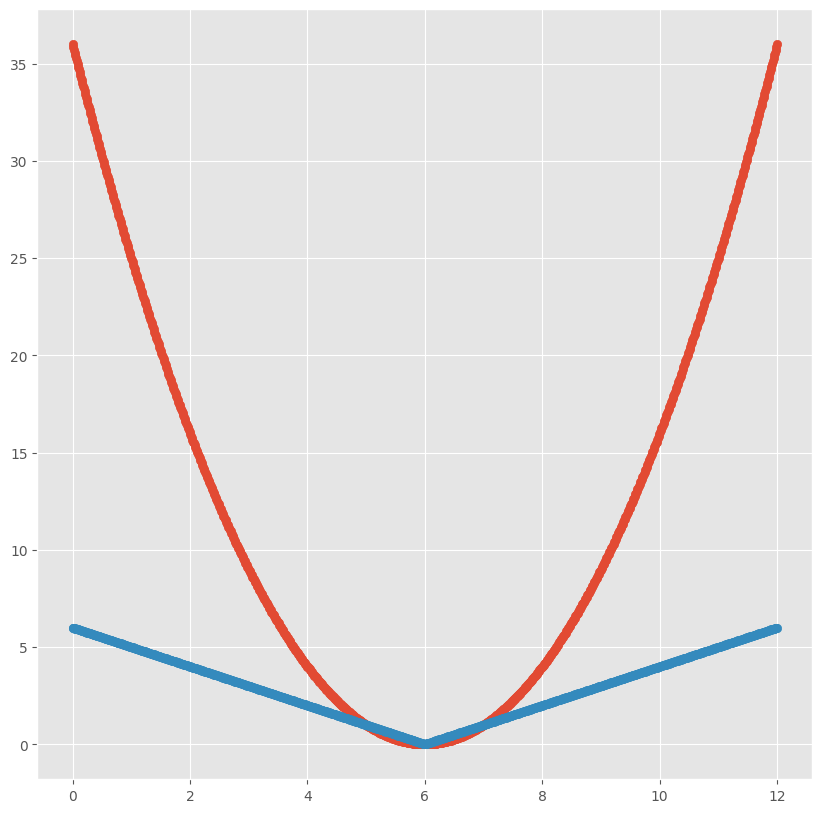

In [8]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))

measurements = np.linspace(0, 12, 1000)
plt.scatter(measurements, (measurements - 6) ** 2, label='Squared Error')
plt.scatter(measurements, abs(measurements - 6), label='Absolute Error')
plt.show()